# Projeto Prático Perceptron Rosenblatt

Neste projeto prático, o objetivo é implementar o algoritmo de treinamento mediante Aprendizado Supervisionado
do neurônio Perceptron de Rosenblatt aplicado em problemas de classificação.

## Equipe:

1. Afonso Henrique Torres Lucas | ifonso.developer@gmail.com | iFonso - 2215080047
2. Erik Gustavo Lima de Oliveira | erik.exatas10@gmail.com | ErikExatas - 2115080049
3. David Augusto De Oliveira E Silva | david-augusto-silva - 2115080006
4. Lilian Iazzai De Souza Oliveira | lilianiazzai@gmail.com | lilianiazzai - 2215080018
5. Vitor Nascimento Aguiar | Vtaguiar1909 - 2115080055

In [1]:
# identificador do arquivo
id = (7+9+6+8+5)%4
print(id)

3


In [2]:
# Bibliotecas
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as skm
from prettytable import PrettyTable

# Módulos
from modules.perceptron import Perceptron
import prettytable

In [3]:
with open('./data/dataAll.txt', 'rb') as f:
    data = f.read()

In [4]:
def get_ndarray_from_file(filename: str) -> np.ndarray:
    """Formato dos dados -> (m, 1, 3) : [[[x_1, x_2, y_d]], ...]"""
    return np.squeeze(np.fromfile(filename, dtype=np.float64).reshape(-1, 1, 3))

In [5]:
def split_data(data: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    """Faz split do dataset -> (m, 2), (m, 1)"""
    return data[:, :2], data[:, 2].reshape(-1, 1)

In [6]:
data = get_ndarray_from_file(f"./data/dataAll.txt")
X, y = split_data(data)

print(f"data: {data.shape} -> {data[0]}")
print(f"X: {X.shape} | y: {y.shape}")

data: (1000, 3) -> [-363.7884  244.1423    0.    ]
X: (1000, 2) | y: (1000, 1)


## Parte I - Problema Linearmente Separável

Treinando um neurônio perceptron usando `dataAll.txt`, para resolver o problema proposto. O neurônio foi treinado usando os seguintes parâmetros:
- Função de ativação degrau, com limiar zero: $\theta = 0$;
- Taxa de aprendizado: $\eta = 0.1$
- Cada peso deve satisfazer $w_i \sim \mathcal{U}(-0.5,\ +0.5)$

In [6]:
data = get_ndarray_from_file(f"./data/dataAll.txt")
X1, y1 = split_data(data)

print(f"Tamanho da amosta: {data.shape}")

Tamanho da amosta: (1000, 3)


In [7]:
d_interval = (-0.5, 0.5)
perceptron = Perceptron(X1.shape[1], d_interval)

print(f"Pesos iniciais: {perceptron.weights}")

Pesos iniciais: [ 0.14466614 -0.44296713 -0.25890239]


In [8]:
epochs, adjusts = perceptron.train(X1, y1, learning_rate=0.1)

print(f"Total de ajustes: {adjusts}")
print(f"Épocas até a convergência: {epochs}")

Total de ajustes: 919
Épocas até a convergência: 8


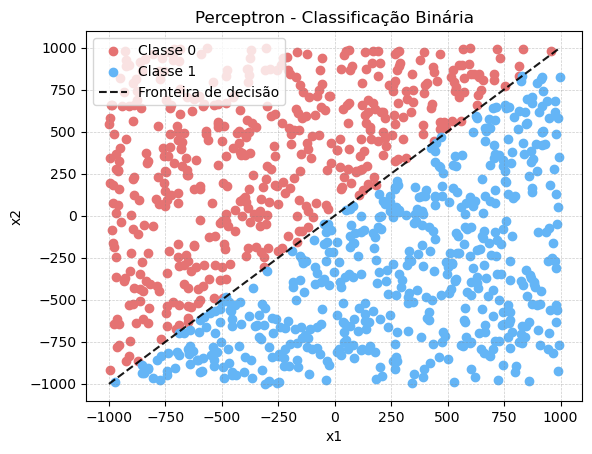

In [9]:
classe_0 = X[y.ravel() == 0]
classe_1 = X[y.ravel() == 1]

plt.scatter(classe_0[:, 0], classe_0[:, 1], color='#E57373', label='Classe 0')
plt.scatter(classe_1[:, 0], classe_1[:, 1], color='#64B5F6', label='Classe 1')

w = perceptron.weights
x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_vals = -(w[0] + w[1] * x_vals) / w[2]
plt.plot(x_vals, y_vals, color='black', linestyle='--', alpha=0.9, label='Fronteira de decisão')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Perceptron - Classificação Binária')
plt.grid(True, alpha=0.4, linestyle='--', linewidth=0.5, color='gray')
plt.show()

## Parte II - Experimentação

Nesta parte, as equipes usarão o seu identificador para trabalhar com um arquivo específico, portanto usaremos o arquivo `data3.txt`. Aproveitando o algoritmo construído na parte I, serão executadas 10 repetições deste para seguintes configurações:

$\eta \times I = \{0.4, 0.1, 0.01\} \times \{(-100, +100), (-0.5, +0.5)\}$

I é o intervalo utilizado para distribuição uniforme do valor dos pesos. No total, serão feitas 60 execuções: 10 execuções para cada uma das 6 configurações.

In [10]:
data = get_ndarray_from_file(f"./data/data{id}.txt")
X3, y3 = split_data(data)

print(f"Tamanho da amosta: {data.shape}")

Tamanho da amosta: (600, 3)


In [11]:
intervals = ((-0.5, 0.5), (-100, 100))
learning_rates = (0.4, 0.1, 0.01)

In [12]:
tabela = PrettyTable([
    "Taxa de aprendizado",
    "Intervalo de Pesos",
    "Quantidade de Ajustes",
    "Menor número de épocas para convergência"
])

for interval in intervals:
    for l in learning_rates:
        epochs = []
        adjustments = []

        for _ in range(10):
            p1 = Perceptron(X3.shape[1], interval)
            e, a = p1.train(X3, y3, l)
            epochs.append(e)
            adjustments.append(a)

        avg = np.average(adjustments)
        std_dev = np.std(adjustments)

        converged_epochs = [ep for ep in epochs if ep != -1]
        min_epochs = min(converged_epochs) if converged_epochs else "N/A"

        tabela.add_row([
            f"{l}",
            f"{interval[0]}, {interval[1]}",
            f"{avg:.1f} ± {std_dev:.1f}",
            f"{min_epochs}"
        ])

In [13]:
tabela

Taxa de aprendizado,Intervalo de Pesos,Quantidade de Ajustes,Menor número de épocas para convergência
0.4,"-0.5, 0.5",803.6 ± 147.4,5
0.1,"-0.5, 0.5",770.7 ± 167.1,3
0.01,"-0.5, 0.5",818.4 ± 220.8,4
0.4,"-100, 100",908.3 ± 336.0,5
0.1,"-100, 100",1249.2 ± 511.8,13
0.01,"-100, 100",13177.7 ± 6486.0,34


In [ ]:
### 2.2 - Experimentação

Nesta parte, as equipes usarão o seu identificador para trabalhar com um arquivo específico. Usaremos, então, o arquivo ```data3.txt```.

Aproveitando o algoritmo construído na seção 2.1, serão executadas 10 repetições deste para seguintes configurações: $\eta \times I = \{0.4, 0.1, 0.01\} \times \{(-100, +100), (-0.5, +0.5)\}$, em que I é o intervalo utilizado para distribuição uniforme do valor dos pesos. No total, serão feitas 60 execuções: 10 execuções para cada uma das 6 configurações.

In [7]:
tabela = PrettyTable([
    "Taxa de aprendizado",
    "Intervalo de Pesos",
    "Quantidade de Ajustes",
    "Menor número de épocas para convergência"
])

In [8]:
data = get_ndarray_from_file(f"./data/data{id}.txt")
X3, y3 = split_data(data)

In [9]:
intervals = ((-0.5, 0.5), (-100, 100))
learning_rates = (0.4, 0.1, 0.01)

In [10]:
# execução do algoritmo para o intervalo (-0.5, 0.5)
for l in learning_rates:
    epochs=[]
    adjustments = []
    for i in range(10):
        p1 = Perceptron(2, intervals[0])
        e = p1.train(X3, y3, l)
        epochs.append(e)
        adjustments.append(e)
    avg = np.average(adjustments)
    std_dev = np.std(adjustments)
    min_epochs = min(epochs)

    tabela.add_row([
        f"{l}",
        f"{intervals[0][0]}, {intervals[0][1]}",
        f"{avg:.1f} +- {std_dev:.1f}",
        f"{min_epochs}"])


In [11]:
# execução do algoritmo para o intervalo (-100, 100)
for l in learning_rates:
    epochs=[]
    adjustments = []
    for i in range(10):
        p1 = Perceptron(2, intervals[1])
        e = p1.train(X3, y3, l)
        epochs.append(e)
        adjustments.append(e)
    avg = np.average(adjustments)
    std_dev = np.std(adjustments)
    min_epochs = min(epochs)

    tabela.add_row([
        f"{l}",
        f"{intervals[1][0]}, {intervals[1][1]}",
        f"{avg:.1f} +- {std_dev:.1f}",
        f"{"Não convergiu" if min_epochs < 0 else min_epochs}"])

In [12]:
tabela

Taxa de aprendizado,Intervalo de Pesos,Quantidade de Ajustes,Menor número de épocas para convergência
0.4,"-0.5, 0.5",14.5 +- 5.9,4
0.1,"-0.5, 0.5",16.8 +- 5.7,9
0.01,"-0.5, 0.5",8.9 +- 5.2,4
0.4,"-100, 100",10.5 +- 6.5,4
0.1,"-100, 100",38.8 +- 35.3,3
0.01,"-100, 100",321.8 +- 215.9,Não convergiu
